In [1]:
import pymc3 as pm
from utils import *
from params import *
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df, basin_idx, basins, coords = read_data(file_dir='../data/hierarchical_septics_v2.csv',
        cols=['ppt_2013', 'water_dist', 'hydraulic_c','median_hse', 'dem', 'flow'], is_balanced=True)

balancing...
repairs: 7.6567198704603285%, non-repairs: 92.34328012953968%
processing soil hydraulic data...
acquiring housing information...
processing DEM and flow information...


# Check Empirical Distribution

Precipitation

Text(0.5, 0, 'Precipitation (inch/month)')

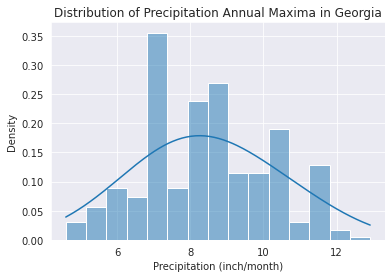

In [3]:
ax = sns.histplot(data=df, x='ppt_2013', stat="density", kde=True, kde_kws={'bw_adjust':3})
ax.set_title('Distribution of Precipitation Annual Maxima in Georgia')
ax.set_xlabel('Precipitation (inch/month)')

Distance to water bodies

(0.0, 16000.0)

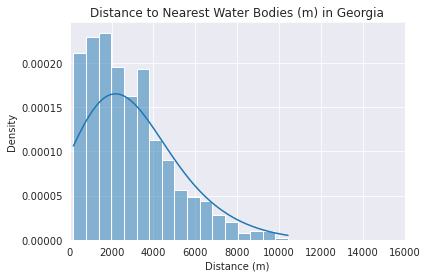

In [30]:
ax = sns.histplot(data=df, x='water_dist', stat="density", kde=True, kde_kws={'bw_adjust':3})
ax.set_title('Distance to Nearest Water Bodies (m) in Georgia')
ax.set_xlabel('Distance (m)')
ax.set_xlim([0,16000])

Median Housing Values

Text(0.5, 0, 'Value ($)')

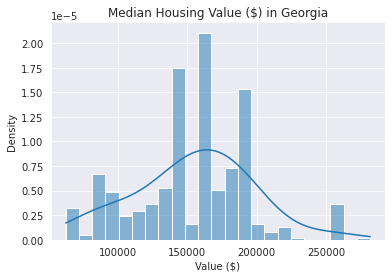

In [4]:
ax = sns.histplot(data=df, x='median_hse', stat="density", kde=True, kde_kws={'bw_adjust':2})
ax.set_title('Median Housing Value ($) in Georgia')
ax.set_xlabel('Value ($)')

DEM

Text(0.5, 0, 'Elevation (m)')

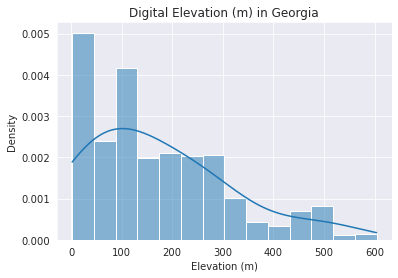

In [27]:
ax = sns.histplot(data=df, x='dem', stat="density", kde=True, kde_kws={'bw_adjust':2})
ax.set_title('Digital Elevation (m) in Georgia')
ax.set_xlabel('Elevation (m)')

### Normalized Version

Precipitation

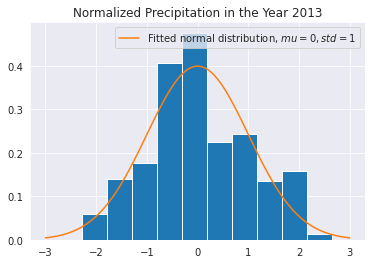

In [5]:
# plotting
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0., scale=1.)
df['ppt_2013_norm'].hist(density=True)
plt.title("Normalized Precipitation in the Year 2013")
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.legend()

Distance to water bodies

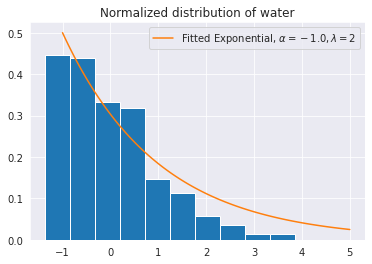

In [6]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-1,5,100)
y = stats.expon.pdf(x, loc=-1.,scale=2)
df['water_dist_norm'].hist(density=True)
plt.plot(x,y, label="Fitted Exponential, $\\alpha=-1.0, \lambda=2.$")
plt.title("Normalized distribution of water")
plt.legend()

Hydraulic Conductivity

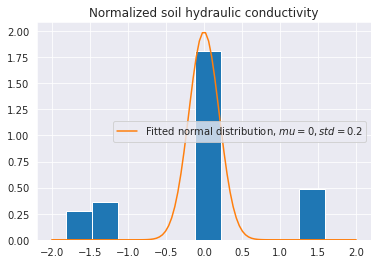

In [7]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-2,2,100)
y = stats.norm.pdf(x, loc=0., scale=0.2)
df['hydraulic_c_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=0.2$")
plt.title("Normalized soil hydraulic conductivity")
plt.legend()

Median housing values

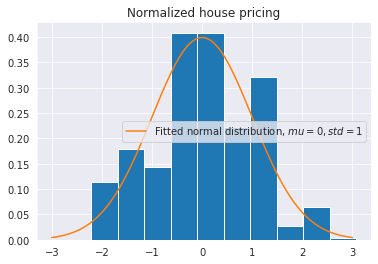

In [8]:
# plotting distribution (using Normal distribution)
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0, scale=1)
df['median_hse_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.title("Normalized house pricing")
plt.legend()

DEM

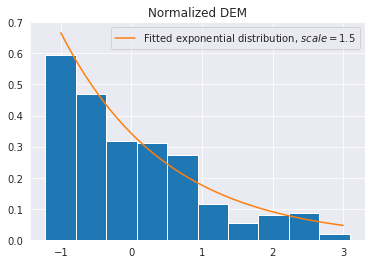

In [9]:
# plotting distribution (using Normal distribution)
x = np.linspace(-1,3,100)
y = stats.expon.pdf(x, loc=-1, scale=1.5)
df['dem_norm'].hist(density=True)
plt.plot(x,y, label="Fitted exponential distribution, $scale= 1.5$")
plt.title("Normalized DEM")
plt.legend()